**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [82]:
# ENTER YOUR CODE HERE
import pandas as pd
import numpy as np

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [83]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 82.1MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [84]:
# ENTER YOUR CODE HERE
df=pd.read_csv('nba_logreg.csv')

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [6]:
#ENTER YOUR CODE HERE

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [8]:
#ENTER YOUR CODE HERE

In [86]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [10]:
#ENTER YOUR CODE HERE

In [87]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [12]:
#ENTER YOUR CODE HERE

In [88]:
df=df.dropna()

**What is the shape of the dataframe now?**

In [14]:
#ENTER YOUR CODE HERE

In [89]:
df.shape

(1329, 21)

**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [16]:
#ENTER YOUR CODE HERE

In [90]:
df_train=df[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']]
df_label=df[['TARGET_5Yrs']]

print("The shape of the features datafarme is:", df_train.shape)
print("The shape of the labels dataframe is:", df_label.shape)

The shape of the features datafarme is: (1329, 19)
The shape of the labels dataframe is: (1329, 1)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [91]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [19]:
#ENTER YOUR CODE HERE

In [92]:
X=df_train
y=df_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The shape of training features dataframe is:", X_train.shape)
print("The shape of testing features dataframe is:", X_test.shape)
print("The shape of training labels dataframe is:", y_train.shape)
print("The shape of test labels dataframe is:", y_test.shape)

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063, 1)
The shape of test labels dataframe is: (266, 1)


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [21]:
#ENTER YOUR CODE HERE

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [22]:
#ENTER YOUR CODE HERE

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy: 74.44%
- F1 score: 81.32%
- Precision: 78.72%
- Recall: 84.09%

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [95]:
#ENTER YOUR CODE HERE

In [96]:
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy of the model is:", accuracy)
print("F1 Score of the model is:", f1)
print("Precision of the model is:", precision)
print("Recall of the model is:", recall)

Accuracy of the model is: 0.7518796992481203
F1 Score of the model is: 0.8135593220338984
Precision of the model is: 0.8089887640449438
Recall of the model is: 0.8181818181818182


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [97]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [28]:
#ENTER YOUR CODE HERE

In [98]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [30]:
#ENTER YOUR CODE HERE

In [99]:
y_pred=model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy of the model is:", accuracy)
print("F1 Score of the model is:", f1)
print("Precision of the model is:", precision)
print("Recall of the model is:", recall)

Accuracy of the model is: 0.7443609022556391
F1 Score of the model is: 0.8131868131868132
Precision of the model is: 0.7872340425531915
Recall of the model is: 0.8409090909090909


### MULTICLASS CLASSIFICATION

In [100]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 78.8MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [114]:
#ENTER YOUR CODE HERE
df=pd.read_csv('social_well_being.csv')

**Always analyse the data.**

In [34]:
#ENTER YOUR CODE HERE

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [103]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [104]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [38]:
#ENTER YOUR CODE HERE

In [105]:
print("The columns are: ", df['Dominant_Emotion'].unique())

The columns are:  ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [40]:
#ENTER YOUR CODE HERE

In [106]:
print("The genders are: ", df['Gender'].unique())
print("The platforms are: ", df['Platform'].unique())

The genders are:  ['Female' 'Male' 'Non-binary']
The platforms are:  ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [42]:
#ENTER YOUR CODE HERE

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [43]:
#ENTER YOUR CODE HERE

In [115]:
gender_encoded = pd.get_dummies(df['Gender'])
gender_encoded.columns=['Male', 'Female', 'Non_Binary']
df=df.drop('Gender', axis=1)
df=pd.concat([df, gender_encoded], axis=1)

print(df)

     User_ID  Age   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25  Instagram                         120              3   
1          2   30    Twitter                          90              5   
2          3   22   Facebook                          60              2   
3          4   28  Instagram                         200              8   
4          5   33   LinkedIn                          45              1   
..       ...  ...        ...                         ...            ...   
919      996   33    Twitter                          85              4   
920      997   22   Facebook                          70              1   
921      998   35   Whatsapp                         110              3   
922      999   28   Telegram                          60              2   
923     1000   27   Snapchat                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                 

**Repeat the drill for the column 'Platform'.**

In [45]:
#ENTER YOUR CODE HERE

In [116]:
platform_encoded = pd.get_dummies(df['Platform'])
platform_encoded.columns=['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp', 'Telegram',
 'Snapchat']
df=df.drop('Platform', axis=1)
df=pd.concat([df, platform_encoded], axis=1)

print(df)

     User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25               

Last categorical feature is our label column.

**Import the module used for label encoding.**

In [117]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [48]:
#ENTER YOUR CODE HERE

In [118]:
le=LabelEncoder()
df['Dominant_Emotion']=le.fit_transform(df['Dominant_Emotion'])

print(df)

     User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25               

In [119]:
print(df.dtypes)

User_ID                       int64
Age                           int64
Daily_Usage_Time (minutes)    int64
Posts_Per_Day                 int64
Likes_Received_Per_Day        int64
Comments_Received_Per_Day     int64
Messages_Sent_Per_Day         int64
Dominant_Emotion              int64
Male                           bool
Female                         bool
Non_Binary                     bool
Instagram                      bool
Twitter                        bool
Facebook                       bool
LinkedIn                       bool
Whatsapp                       bool
Telegram                       bool
Snapchat                       bool
dtype: object


In [120]:
bool_cols = [
    'Male', 'Female', 'Non_Binary',
    'Instagram', 'Twitter', 'Facebook',
    'LinkedIn', 'Whatsapp', 'Telegram', 'Snapchat'
]

df[bool_cols] = df[bool_cols].astype(int)

In [121]:
df.columns

Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Male', 'Female',
       'Non_Binary', 'Instagram', 'Twitter', 'Facebook', 'LinkedIn',
       'Whatsapp', 'Telegram', 'Snapchat'],
      dtype='object')

In [122]:
print("Label Mapping:", list(le.classes_))

Label Mapping: ['Anger', 'Anxiety', 'Boredom', 'Happiness', 'Neutral', 'Sadness']


In [123]:
print(df)

     User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25               

Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [54]:
#ENTER YOUR CODE HERE

In [144]:
df_train=df[['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Male', 'Female',
       'Non_Binary', 'Instagram', 'Twitter', 'Facebook', 'LinkedIn',
       'Whatsapp', 'Telegram', 'Snapchat']]
df_label=df[['Dominant_Emotion']]

X = df_train
y = df_label.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The shape of training features dataframe is:", X_train.shape)
print("The shape of testing features dataframe is:", X_test.shape)
print("The shape of training labels dataframe is:", y_train.shape)
print("The shape of test labels dataframe is:", y_test.shape)

split_ratio=len(X_train) / len(X_test)
print("The train-to-test split ratio is:", split_ratio)

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [145]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [146]:
#ENTER YOUR CODE HERE

In [147]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

**Create and print the Prediction Dataframe.**

In [59]:
#ENTER YOUR CODE HERE

In [148]:
y_pred=knn_model.predict(X_test)
pred_df=pd.DataFrame({'Dominant_Emotion_Encoded_Predicted': y_pred})
print(pred_df)

     Dominant_Emotion_Encoded_Predicted
0                                     0
1                                     0
2                                     2
3                                     3
4                                     4
..                                  ...
180                                   2
181                                   1
182                                   0
183                                   5
184                                   3

[185 rows x 1 columns]


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [61]:
#ENTER YOUR CODE HERE

In [149]:
pred_df['Dominant_Emotion_Predicted']=le.inverse_transform(pred_df['Dominant_Emotion_Encoded_Predicted'])
print(pred_df)

     Dominant_Emotion_Encoded_Predicted Dominant_Emotion_Predicted
0                                     0                      Anger
1                                     0                      Anger
2                                     2                    Boredom
3                                     3                  Happiness
4                                     4                    Neutral
..                                  ...                        ...
180                                   2                    Boredom
181                                   1                    Anxiety
182                                   0                      Anger
183                                   5                    Sadness
184                                   3                  Happiness

[185 rows x 2 columns]


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [63]:
#ENTER YOUR CODE HERE

In [150]:
y_test_decoded=le.inverse_transform(y_test)
y_pred_decoded=pred_df['Dominant_Emotion_Predicted']

print("Accuracy of the model is:", accuracy_score(y_test_decoded, y_pred_decoded))

Accuracy of the model is: 0.9891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [65]:
#ENTER YOUR CODE HERE

In [130]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_decoded))

Confusion Matrix:
 [[29  0  0  0  0  0]
 [ 0 34  1  0  0  0]
 [ 0  0 18  0  0  0]
 [ 0  1  0 42  0  0]
 [ 0  0  0  0 35  0]
 [ 0  0  0  0  0 25]]

Classification Report:
               precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       0.97      0.97      0.97        35
     Boredom       0.95      1.00      0.97        18
   Happiness       1.00      0.98      0.99        43
     Neutral       1.00      1.00      1.00        35
     Sadness       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [131]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

**Now instantiate and fit a model.**

In [68]:
#ENTER YOUR CODE HERE

In [132]:
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [70]:
#ENTER YOUR CODE HERE

**Finally, print the accuracy, confusion matrix and classification report.**

In [71]:
#ENTER YOUR CODE HERE

In [133]:
y_pred_nb=nb_model.predict(X_test)
y_pred_nb_decoded=le.inverse_transform(y_pred_nb)

print("Accuracy of the model is:", accuracy_score(y_test_decoded, y_pred_nb_decoded))

print("Confusion Matrix:\n", confusion_matrix(y_test_decoded, y_pred_nb_decoded))
print("\nClassification Report:\n", classification_report(y_test_decoded, y_pred_nb_decoded))

Accuracy of the model is: 0.42702702702702705
Confusion Matrix:
 [[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [12  0 17  5  0  1]
 [12  0  7  1  0  5]]

Classification Report:
               precision    recall  f1-score   support

       Anger       0.36      0.79      0.49        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.26      0.78      0.39        18
   Happiness       0.63      0.86      0.73        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.62      0.20      0.30        25

    accuracy                           0.43       185
   macro avg       0.31      0.44      0.32       185
weighted avg       0.31      0.43      0.32       185



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

RANDOM FOREST CLASSIFIER

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
X = df.drop(columns=['User_ID', 'Dominant_Emotion'])
y = df['Dominant_Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [154]:
y_test_decoded=le.inverse_transform(y_test)
y_pred_decoded=pred_df['Dominant_Emotion_Predicted']

In [155]:
y_pred=rf.predict(X_test)
y_pred_decoded=le.inverse_transform(y_pred)

print("Accuracy of the model is:", accuracy_score(y_test_decoded, y_pred_decoded))

Accuracy of the model is: 0.9892086330935251


DECISION TREE

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [159]:
y_pred = dtree.predict(X_test)
y_pred_decoded=le.inverse_transform(y_pred)

print("Accuracy of the model is:", accuracy_score(y_test_decoded, y_pred_decoded))

Accuracy of the model is: 0.9712230215827338


# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [77]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  18344  18345  18346  18347  18348  1834

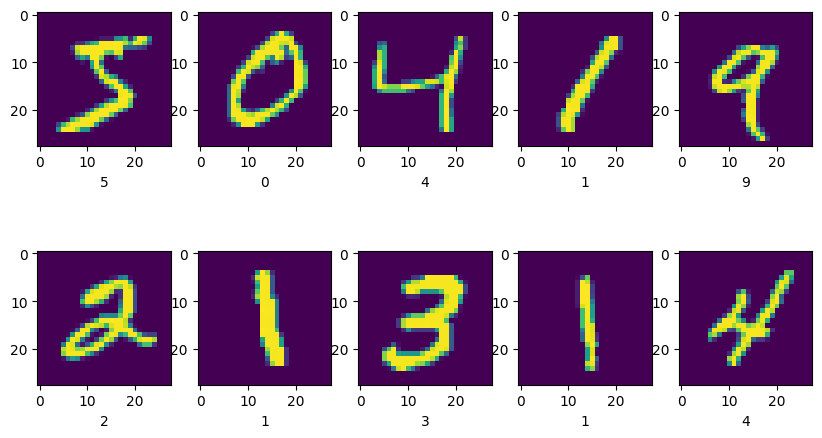

In [78]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

Roll number: 240221 (remainder=1)

In [79]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    pass

  def softmax(self, Z):
    # Implement the softmax activation function
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    pass

  def one_hot_encode(self, y):
    # Implement one hot encoding
    pass

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    pass

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    pass

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

    #implement train
    pass

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [80]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

In [81]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



TypeError: cannot unpack non-iterable NoneType object

In [ ]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
